###Experiment 2

Name - Khushi Jashnani

UID - 2018130017

###**Objective**: To implement and use Principal Component Analysis using Python Platform

#### **Case study** : 

Auto-MPG prediction – Use Linear Regression to build a Model to predict the mpg of cars in terms of 3 multivalued discrete and 5 continuous
attributes.


#### **Outcomes** :

1. To learn how PCA is to identify an underlying structure or pattern beneath set of multivariate data.

2. To interpret the results of evaluated components

### Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [1]:
# importing the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# Connecting/Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Colab Notebooks/DS/Labs/Exp1

/content/drive/MyDrive/Colab Notebooks/DS/Labs/Exp1


In [4]:
%cd Auto-mpg

/content/drive/MyDrive/Colab Notebooks/DS/Labs/Exp1/Auto-mpg


1. Load the dataset (Use pandas )

In [5]:
# Reading the training dataset
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
auto_misspelled = {'chevroelt': 'chevrolet',
                   'chevy': 'chevrolet',
                   'vokswagen': 'volkswagen',
                   'vw': 'volkswagen',
                   'hi': 'harvester',
                   'maxda': 'mazda',
                   'toyouta': 'toyota',
                   'mercedes-benz': 'mercedes'}

data['brand'] = [auto_misspelled[key].title() if key in auto_misspelled else \
               key.title() for key in [i.split()[0] for i in data['car name']]]

data['name'] = [' '.join(i.split()[1:]).title() for i in data['car name']]
data = data.drop(columns = 'car name', axis = 0)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130,3504,12.0,70,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165,3693,11.5,70,1,Buick,Skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,Plymouth,Satellite
3,16.0,8,304.0,150,3433,12.0,70,1,Amc,Rebel Sst
4,17.0,8,302.0,140,3449,10.5,70,1,Ford,Torino


2. and 3. Exploratory Data Analysis of the dataset and Data Preprocessing (Handling NA values)

In [7]:
# Checking the shape of the dataset
data.shape

(398, 10)

In [8]:
# Check for null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
brand           0
name            0
dtype: int64

In [9]:
# Checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   brand         398 non-null    object 
 9   name          398 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 31.2+ KB


In [10]:
data['horsepower'].value_counts().to_frame()

,horsepower
150,22
90,20
88,19
110,18
100,17
...,...
61,1
93,1
148,1
152,1


In [11]:
data.loc[data['horsepower'] == "?", 'horsepower'] = 0

In [12]:
data['horsepower'].value_counts().to_frame()

,horsepower
150,22
90,20
88,19
110,18
100,17
...,...
61,1
93,1
148,1
152,1


In [13]:
data.loc[:, 'horsepower'] = pd.to_numeric(data.loc[:, 'horsepower'])

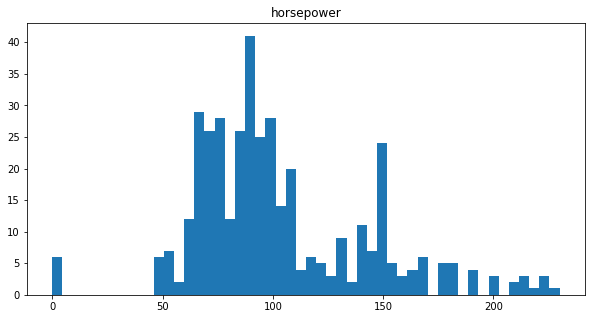

In [14]:
plt.figure(figsize=(10,5))
plt.hist(data['horsepower'], bins=50)
plt.title('horsepower')
plt.show()

In [15]:
pd.to_numeric(data.loc[data['horsepower'] != 0, 'horsepower']).median()

93.5

Inputing the horse power column with the median

In [16]:
data.loc[data['horsepower'] == 0, 'horsepower'] = pd.to_numeric(data.loc[data['horsepower'] != 0, 'horsepower']).median()

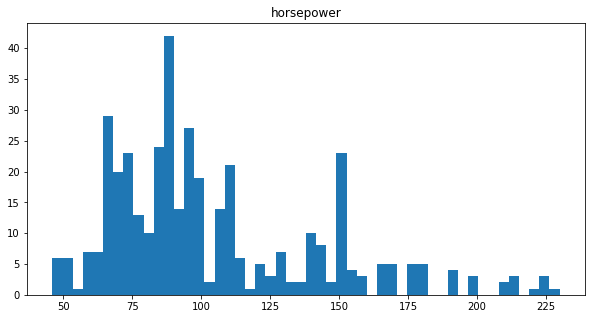

In [17]:
plt.figure(figsize=(10,5))
plt.hist(data['horsepower'], bins=50)
plt.title('horsepower')
plt.show()

In [18]:
data['brand'].value_counts()

Ford          51
Chevrolet     47
Plymouth      31
Amc           28
Dodge         28
Toyota        26
Datsun        23
Volkswagen    22
Buick         17
Pontiac       16
Honda         13
Mazda         12
Mercury       11
Oldsmobile    10
Fiat           8
Peugeot        8
Audi           7
Volvo          6
Chrysler       6
Renault        5
Saab           4
Opel           4
Subaru         4
Mercedes       3
Cadillac       2
Bmw            2
Capri          1
Harvester      1
Triumph        1
Nissan         1
Name: brand, dtype: int64

In [19]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,Buick,Skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,Plymouth,Satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,Amc,Rebel Sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,Ford,Torino


In [20]:
data.describe()  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [21]:
discrete_columns = []
continuous_columns = []
for x in data.columns :
    if data[x].nunique() < 10 or x in ["name", "brand"]:
        discrete_columns.append(x)
    else:
        continuous_columns.append(x)
print("Discrete columns : ", discrete_columns)
print("Continuous columns : ", continuous_columns)

Discrete columns :  ['cylinders', 'origin', 'brand', 'name']
Continuous columns :  ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


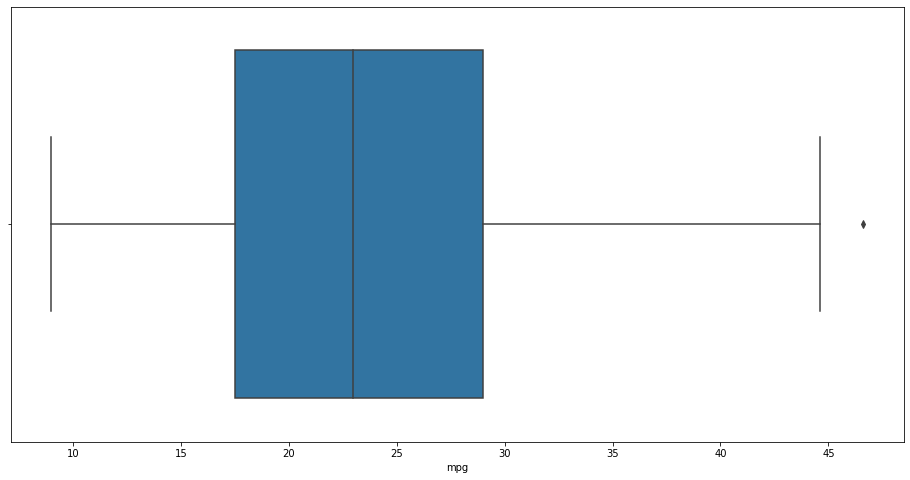

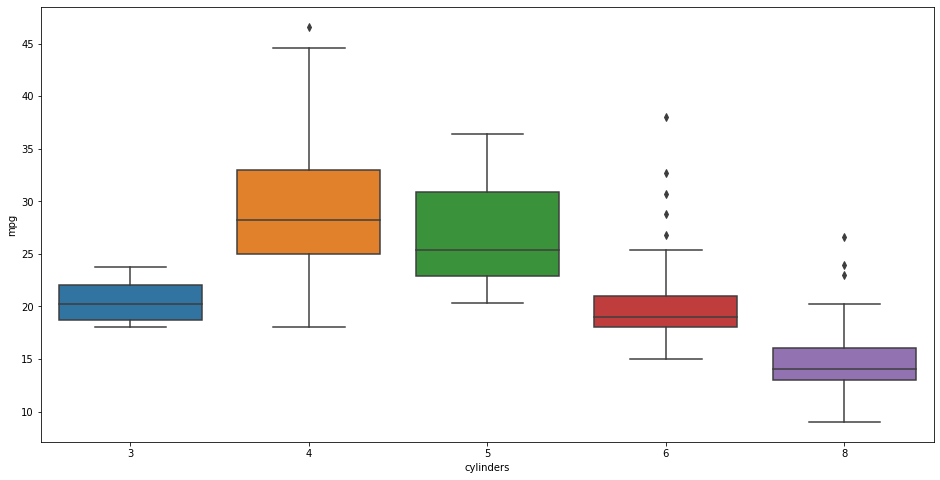

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


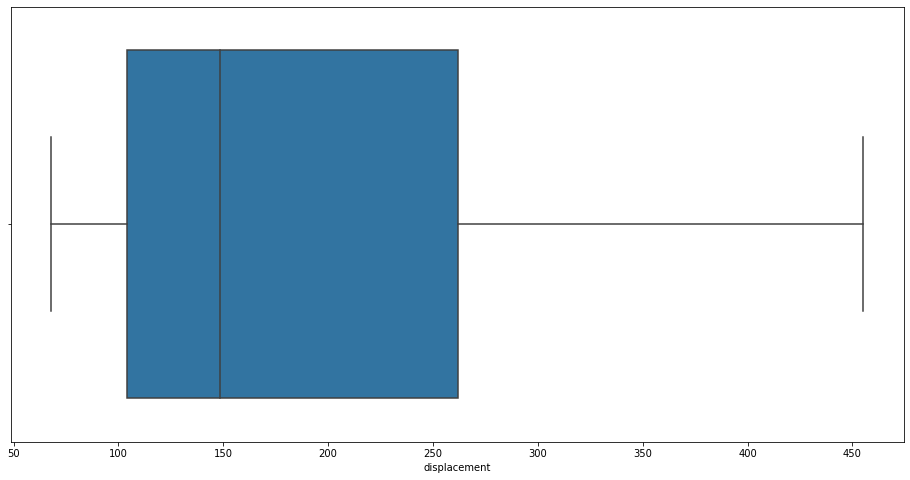

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


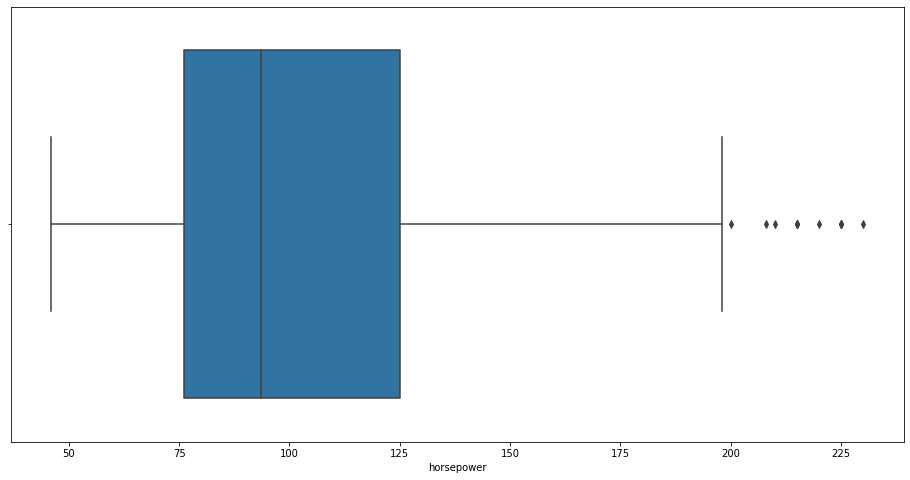

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


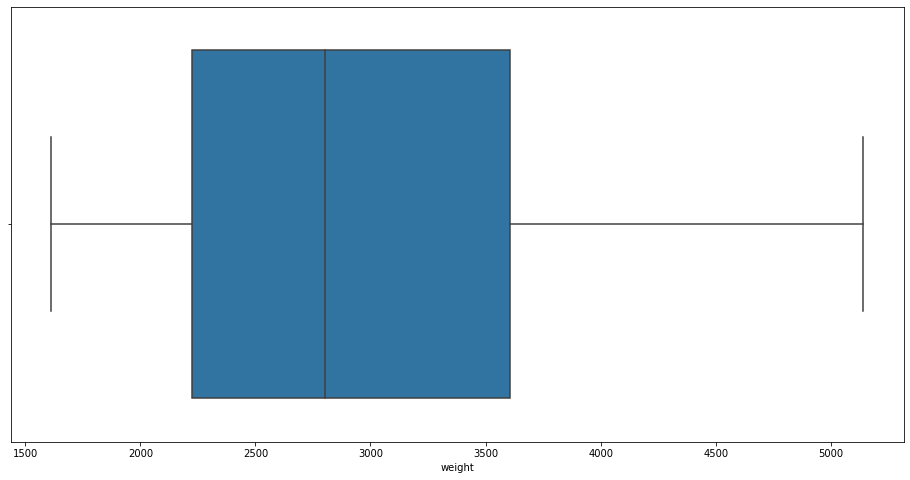

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


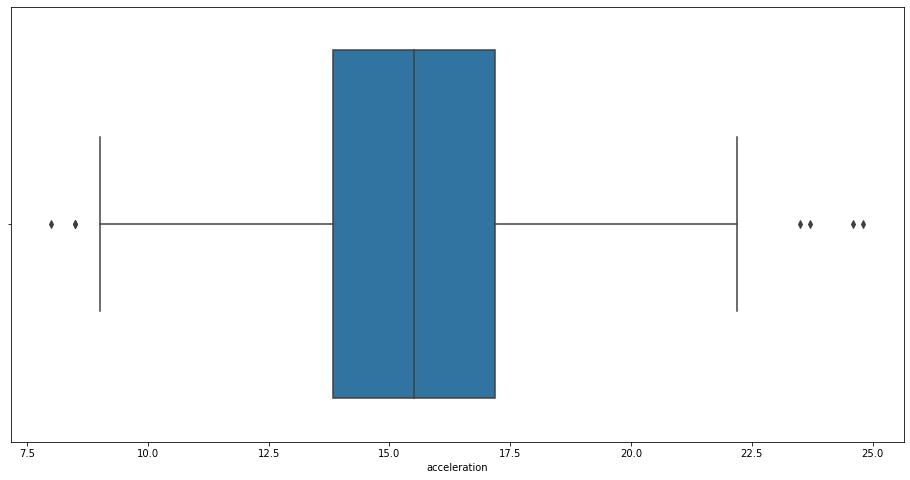

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


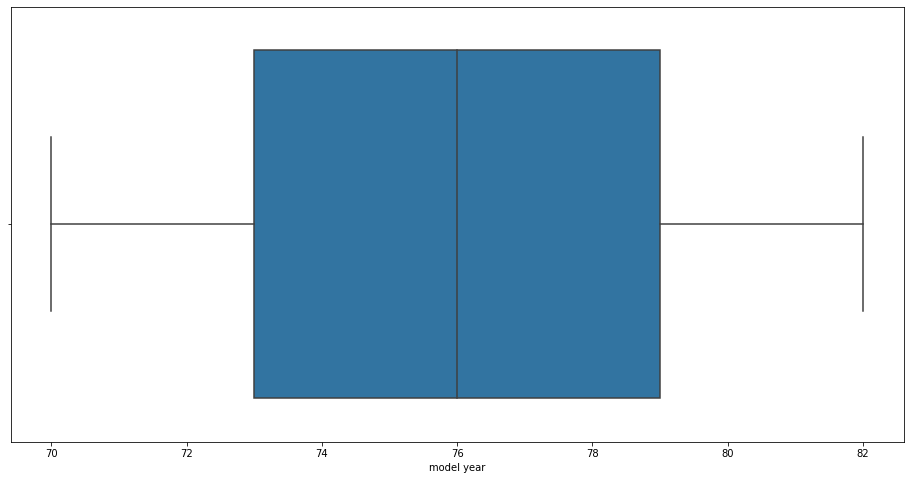

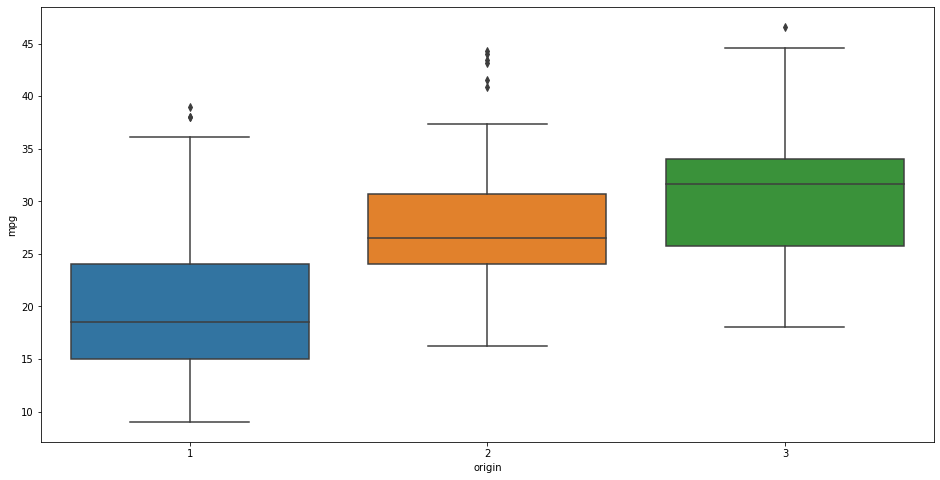

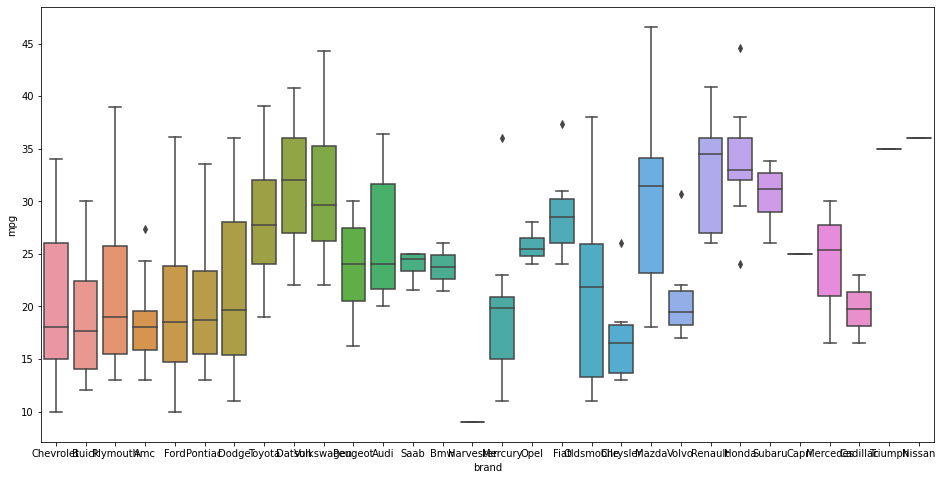

<Figure size 1152x576 with 0 Axes>

In [22]:
for x in data.columns:
    plt.figure(figsize=(16,8))
    if x in ["name"]:
        continue
    if x in discrete_columns :
        sns.boxplot(x=data[x], y=data['mpg'])
        plt.show()
    else:
        sns.boxplot(data[x])
        plt.show()

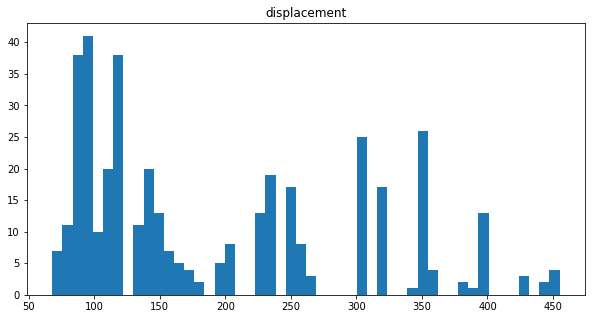

In [23]:
plt.figure(figsize=(10,5))
plt.hist(data['displacement'], bins=50)
plt.title('displacement')
plt.show()

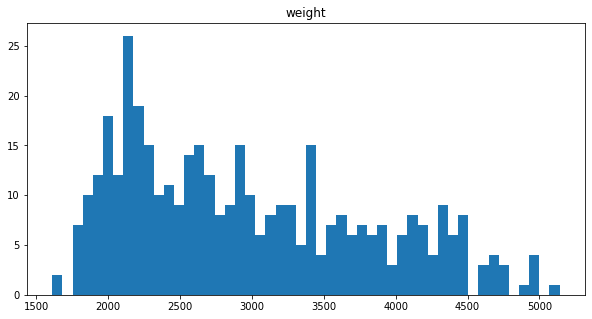

In [24]:
plt.figure(figsize=(10,5))
plt.hist(data['weight'], bins=50)
plt.title('weight')
plt.show()

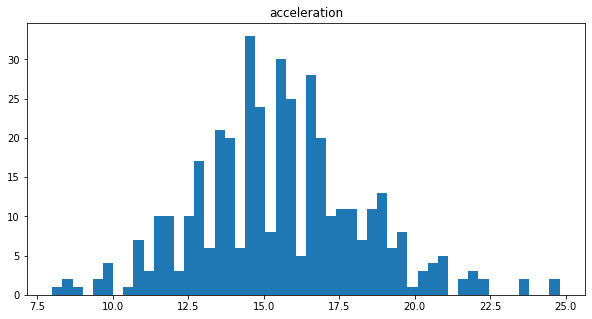

In [25]:
plt.figure(figsize=(10,5))
plt.hist(data['acceleration'], bins=50)
plt.title('acceleration')
plt.show()

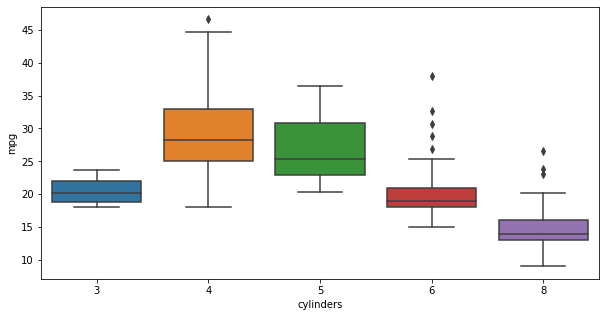

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['cylinders'], y=data['mpg'])

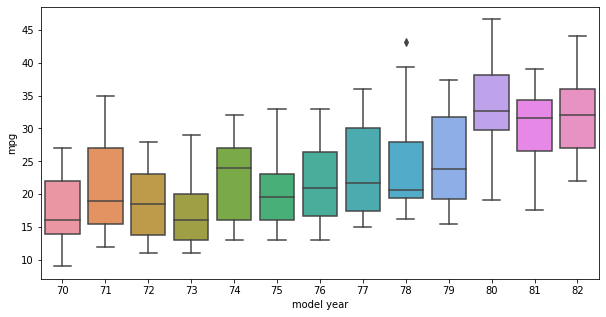

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['model year'], y=data['mpg'])

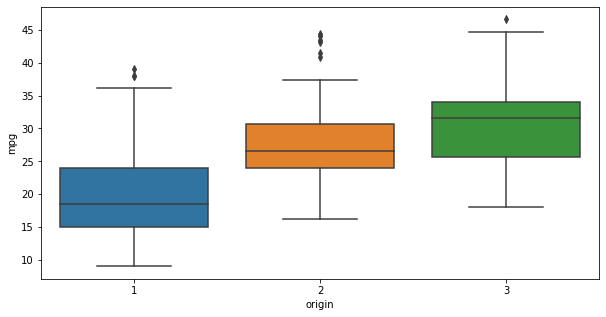

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['origin'], y=data['mpg'])

In [29]:
data = data.drop(['name'], axis=1)
discrete_columns.remove("name")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,Chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,Buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,Plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,Amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,Ford


#### Removing the outliers

In [30]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1 = q1, q3 = q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    return dataframe
    
for col in continuous_columns:
    data = replace_with_thresholds(data, col, q1 = 0.1, q3 = 0.9)

#### Transforming the features by converting the categorical columns into one hot vectors

In [31]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe,
                               columns = categorical_cols,
                               drop_first = drop_first)
    return dataframe


ohe_cols = discrete_columns
print('Multiclass Variables: {}'.format(ohe_cols))
data = one_hot_encoder(data, ohe_cols)

Multiclass Variables: ['cylinders', 'origin', 'brand']


In [32]:
data.head()

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,brand_Amc,brand_Audi,brand_Bmw,brand_Buick,brand_Cadillac,brand_Capri,brand_Chevrolet,brand_Chrysler,brand_Datsun,brand_Dodge,brand_Fiat,brand_Ford,brand_Harvester,brand_Honda,brand_Mazda,brand_Mercedes,brand_Mercury,brand_Nissan,brand_Oldsmobile,brand_Opel,brand_Peugeot,brand_Plymouth,brand_Pontiac,brand_Renault,brand_Saab,brand_Subaru,brand_Toyota,brand_Triumph,brand_Volkswagen,brand_Volvo
0,18.0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Understanding the correlation between features

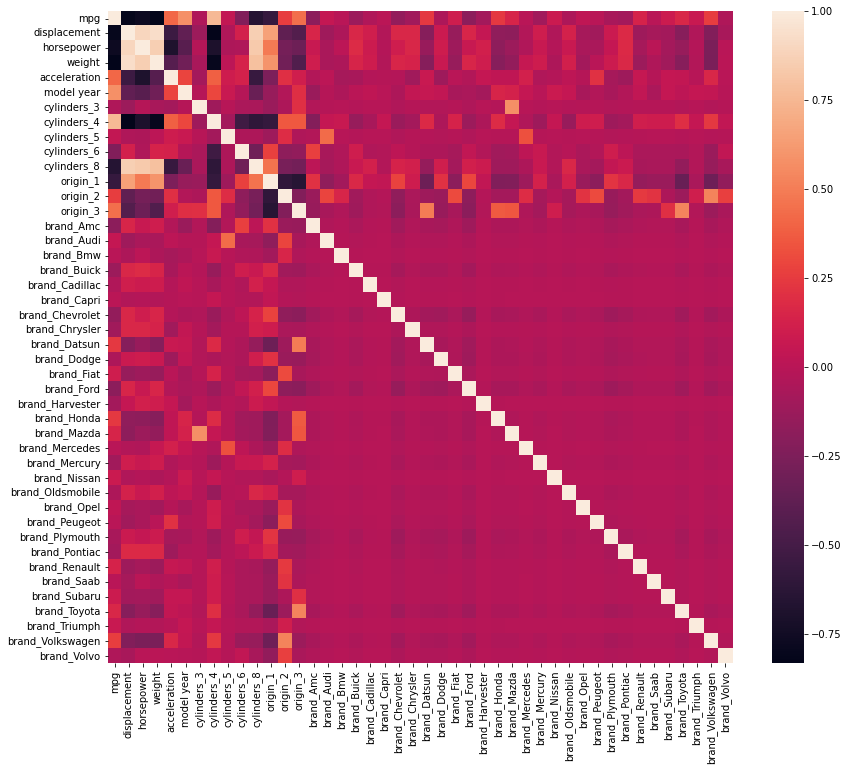

In [33]:
corr = data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr)

#### Defining the independent and dependent variables for the model

In [34]:
y = data['mpg']
X = data.drop(['mpg'], axis=1)

In [35]:
X.shape

(398, 43)

In [36]:
X.head()

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,brand_Amc,brand_Audi,brand_Bmw,brand_Buick,brand_Cadillac,brand_Capri,brand_Chevrolet,brand_Chrysler,brand_Datsun,brand_Dodge,brand_Fiat,brand_Ford,brand_Harvester,brand_Honda,brand_Mazda,brand_Mercedes,brand_Mercury,brand_Nissan,brand_Oldsmobile,brand_Opel,brand_Peugeot,brand_Plymouth,brand_Pontiac,brand_Renault,brand_Saab,brand_Subaru,brand_Toyota,brand_Triumph,brand_Volkswagen,brand_Volvo
0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

# Splitting the dataset into train test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# Applying standard scaling to the train dataset
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train) #scaling features!
X_test = scaler.transform(X_test) # applyting the same transformation to the test features

4. Apply Normalization and Generate Covariance Matrix

In [40]:
# Generating the covariance matrix from mean 
mean_vec = np.mean(X_train,axis=0)
cov_mat = (X_train-mean_vec).T.dot((X_train-mean_vec))/(X_train.shape[0]-1)
mean_vect = np.mean(X_test,axis=0)
cov_matt = (X_test-mean_vec).T.dot((X_test-mean_vec))/(X_test.shape[0]-1)
print(cov_mat)

[[ 1.003367    0.88430299  0.92903922 ... -0.0405814  -0.23436403
  -0.07322441]
 [ 0.88430299  1.003367    0.84627719 ... -0.02399842 -0.26217207
  -0.01939002]
 [ 0.92903922  0.84627719  1.003367   ... -0.03346916 -0.27384445
   0.00731465]
 ...
 [-0.0405814  -0.02399842 -0.03346916 ...  1.003367   -0.0138681
  -0.00679107]
 [-0.23436403 -0.26217207 -0.27384445 ... -0.0138681   1.003367
  -0.02787736]
 [-0.07322441 -0.01939002  0.00731465 ... -0.00679107 -0.02787736
   1.003367  ]]


In [41]:
# Getting the eigen values and eigen vectors
cov_mat = np.cov(X_train.T)
train_eig_vals, train_eig_vecs = np.linalg.eig(cov_mat)
cov_matt = np.cov(X_test.T)
eig_vals,eig_vecs = np.linalg.eig(cov_mat)
print(eig_vals)
print(eig_vecs)

[ 6.20618863e+00  2.42240462e+00  2.08004819e+00  1.71117791e+00
  2.94518488e-02  5.33600754e-02  1.07115049e-01  1.58004610e+00
  3.28003188e-01  3.95747606e-01  4.31204784e-01  5.88737395e-01
  1.33457188e+00  7.53208056e-01  1.23091056e+00  1.18410758e+00
  9.23838477e-01  1.13634569e+00  1.08851209e+00  1.07961773e+00
  1.07443962e+00  1.06121928e+00  1.05056783e+00  1.04267385e+00
  1.03975853e+00  1.03649998e+00  1.02705512e+00  1.02435846e+00
  1.02005494e+00  1.00729439e+00  1.01763872e+00  1.01588979e+00
  1.01532288e+00  1.01406555e+00  1.00892237e+00  1.01022899e+00
  1.01082638e+00 -2.18926685e-15  2.08380336e-15 -3.79519041e-16
  2.89498931e-16  8.84871703e-16  0.00000000e+00]
[[-3.85101005e-01  4.03890994e-03  6.64004216e-02 ...  7.57812973e-16
   1.14156725e-15  0.00000000e+00]
 [-3.48464250e-01 -2.97957584e-02  2.62320097e-01 ... -2.33584677e-15
   1.76105722e-15  0.00000000e+00]
 [-3.63036328e-01  4.73054929e-02  5.18161119e-02 ...  1.07411284e-15
   1.08938754e-15  0

5. Apply PCA

In [42]:
# Using the PCA library to reduce dimensions of the dataset
from sklearn.decomposition import PCA 
pca = PCA(n_components = 17) 
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
X_train.shape

(298, 17)

In [43]:
pca.components_

array([[ 3.85101005e-01,  3.48464250e-01,  3.63036328e-01,
        -2.10527993e-01, -1.65482993e-01, -3.04996030e-02,
        -3.33342645e-01, -3.14320754e-02,  8.17335912e-02,
         3.20686886e-01,  3.24687955e-01, -1.86831663e-01,
        -2.15359040e-01,  5.59701263e-02, -4.54283718e-02,
        -2.16302946e-02,  8.57719891e-02,  3.92903365e-02,
        -6.01678558e-03,  9.78622767e-02, -8.79344625e-04,
        -1.15240848e-01,  6.58392571e-02, -6.43080319e-02,
         9.40364575e-02,  3.81055142e-02, -8.09552795e-02,
        -6.33545793e-02, -2.48315746e-02,  4.30885704e-02,
         0.00000000e+00,  5.21059459e-02, -3.82459961e-02,
        -5.51192004e-02,  5.69386644e-02,  5.28123073e-02,
        -5.21284126e-02, -2.34582620e-02, -5.65996207e-02,
        -1.11036827e-01, -2.27831020e-02, -1.21176790e-01,
        -3.14392454e-02],
       [ 4.03890994e-03, -2.97957584e-02,  4.73054929e-02,
         1.11403010e-01, -7.25933341e-02, -1.99977681e-01,
         8.97478726e-03,  2.15

6. Build the model, summarize it and evaluate the model and Summarize

In [44]:
# Applying linear regression to the target variable
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

6. Prediction

In [45]:
# Predicting the X_test
pred = linear.predict(X_test)
actual = y_test

In [46]:
linear.score(X_test, y_test)

0.8140565756993702

7. Tuning and Evaluating the model

In [47]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actual, pred)
print("Linear Regression MAE:", mae)

Linear Regression MAE: 2.5775680333803224


In [48]:
mse = mean_squared_error(actual, pred)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 10.558521408869604


In [49]:
print("LR Coef:", linear.coef_)

LR Coef: [-2.65383977 -0.35752489 -0.18365545 -0.77759876  0.54819337  1.41251165
  0.22832011 -0.57058111 -0.13393462 -0.08620416  0.22612519 -0.30033679
  0.72149674 -0.10573847  0.17833134 -0.03595885 -0.21963159]


### Conclusion -

Through this experiment I understood how to apply PCA and understood how PCA can help us reduce the size of our dataset while retaining the most variant features. I have applied PCA to the Auto-MPG dataset to predict the miles per gallon depending on the various physical features of the car.